# DSC550
# Gillian Tatreau
# Term Project
# Spring 2023

## Milestone 1
### Week 6

### Introduction

Electric vehicle sales are rapidly increasing, with a reported increase from 0.2% to 4.6% of total vehicle sales from 2011 to 2021; therefore, it is becomingly increasingly important for car manufacturers to understand where potential future consumers are coming from. If it were possible to predict the brand of an electric vehicle purchased, given geographical information about the consumer, it would be very beneficial to these manufacturers at various levels of their corporation. For example, being able to predict the brand for a given area, the likelihood of closing a sales deal for a local car dealership could be imputed. This could give manufacturers information about where to build more electric vehicle support infrastructure, such as charging stations, and licensing mechanics that specialize in their vehicles. 

Using Electric Vehicle Population Data on electric vehicles currently registered through Washington State Department of Licensing, the model will attempt to predict the make of the car given geographical demographic information. The data includes VIN, city, county, state, postal code, legislative district, location, electric utility, 2020 census tract, Department of Licensing vehicle ID for each vehicle as well as vehicle specific information (make, model, year, type, electric range, and base MSRP). The target for the model will be the car’s make. Since we are trying to predict a vehicle's make, we cannot include any data that would not be known if we do not know yet what car was purchased, which would be the model, year, electric range, VIN, or Department of Licensing vehicle ID. We can include the type of elctric vehicle and the base MSRP as a consumer would likely already know what type of car they are looking for (as this is also something that is not dependent on a car's make since most car manufacturers produce several types of electric vehicle) and how much they are willing to spend. 

Being able to predict a car’s manufacturer based on demographic information can have a lot of importance to that manufacturer: it gives insight into places to focus their advertisements to increase sales. The demographic information includes legislative district; if this feature has any predictive power, the model has the potential to be politically informative as well as economically informative because it could give these elected officials insight into where their constituents’ interests lie. This could also be exploited by manufacturers because they might give more support to officials that represent districts in which there is a high population of their vehicles in order to increase their sway should they ever need political backing in a future business venture in the area. 


### Graphical Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read file to dataframe
df = pd.read_csv("/Users/gillian/Documents/Bellevue Grad Program/Spring 2023/DSC550/Electric_Vehicle_Population_Data.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB2J,Suffolk,Suffolk,VA,23435.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,476647986,POINT (-76.42443 36.8752),NaN,5.180008e+10
1,5YJ3E1ECXL,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,103490145,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,WA1LAAGE7M,Yakima,Yakima,WA,98908.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,14.0,144941534,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
3,5YJ3E1EA1K,Danville,Danville,VA,24541.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,168513922,POINT (-79.4172 36.58598),NaN,5.159000e+10
4,1FADP5CU9E,Norfolk,Norfolk,VA,23518.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,NaN,150749378,POINT (-76.21549 36.92478),NaN,5.171001e+10


#### Pie Chart for Car Models

In [3]:
# top 10 models value counts
df["Model"].value_counts().head(10)

MODEL 3        24117
MODEL Y        19901
LEAF           12931
MODEL S         7386
BOLT EV         5074
VOLT            4895
MODEL X         4661
PRIUS PRIME     2423
NIRO            2326
ID.4            2139
Name: Model, dtype: int64

In [4]:
# number of vehicles left that are not the top 10 models
len(df.index) - df["Model"].value_counts().head(10).sum()

36125

In [5]:
# dictionary for top 10 models and their values
top10 = {
    "MODEL 3": 24117,
    "MODEL Y": 19901,
    "LEAF": 12931,
    "MODEL S": 7386,
    "BOLT EV": 5076,
    "VOLT": 4895,
    "MODEL X": 4661,
    "PRIUS PRIME": 2423,
    "NIRO": 2326,
    "ID.4": 2139,
    "OTHER": 36125
}

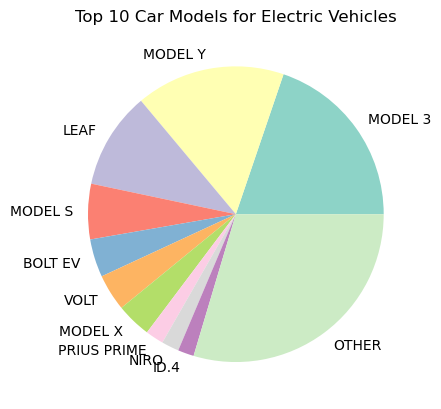

In [6]:
# pie chart for distribution of top 10 models, all others are denoted as "OTHER"
plt.pie(top10.values(), labels = top10.keys(), colors=sns.color_palette('Set3'))
plt.title("Top 10 Car Models for Electric Vehicles")
plt.savefig("Top_10_Car_Models_for_Electric_Vehicles.png")
plt.show()

These classes are highly unbalanced; however, the top 10 models represent the majority of the vehicles and the others can be generalized into an other category that is comparable in proportion to the top 2 car models in the data set. The heavy prevalence only a couple of models in the data is related to the popularity and availability both of the model itself, and the brand. The top 2 models represent the top brand, and the third most common model represents the second most popular brand. 

#### Pie Chart for Car Brands

In [7]:
# top 5 makes value counts
df["Make"].value_counts().head()

TESLA        56116
NISSAN       12938
CHEVROLET    10775
FORD          6571
BMW           5350
Name: Make, dtype: int64

In [8]:
# number of vehicles that are not top 5 car makers
len(df.index) - df["Make"].value_counts().head().sum()

30228

In [9]:
# dictionary for top 5 car makes with their values
top5 = {
    "TESLA": 56116,
    "NISSAN": 12938,
    "CHEVROLET": 10775,
    "FORD": 6571,
    "BMW": 5350,
    "OTHER": 30228
}

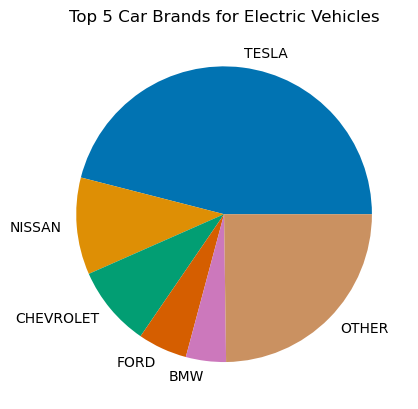

In [10]:
# pie chart for distribution of top 5 brands, all others are denoted as "OTHER"
plt.pie(top5.values(), labels = top5.keys(), colors=sns.color_palette('colorblind'))
plt.title("Top 5 Car Brands for Electric Vehicles")
plt.savefig("Top_5_Car_Brands.png")
plt.show()

If we compared this chart to the one above, of the most common models, we would see the relationship between relative size: as Tesla makes the Model 3, Model Y, and Model S (the first, second, and fourth top models respectively) we see that reflected in Tesla's proportion in this chart. While the classes are again deeply unbalanced, the imbalances are much less severe. Also, the prevalence of one company over another in the population of electric vehicles might be explained by the companies' philosophy as well. Tesla only sells electriv vehicles, and have very few model options on the market, while the other car brands have many more models available on the market and have a variety of electric vehicles, hybrids, and gas cars. This might suggest that other brands that do not put as much emphasis on electric vehicle models may not be able to sell as many electric vehicles because their electric vehicles only represent a portion of the cars they manufacture. 

#### Pie Chart of Electric Vehicle Type

In [11]:
# number of battery vs hybrid vehicles
df["Electric Vehicle Type"].value_counts()

Battery Electric Vehicle (BEV)            94118
Plug-in Hybrid Electric Vehicle (PHEV)    27860
Name: Electric Vehicle Type, dtype: int64

In [12]:
# dictionary for electric vehicle types
ev_type = {
    "Battery": 94118,
    "Plug-in hybrid": 27860
}

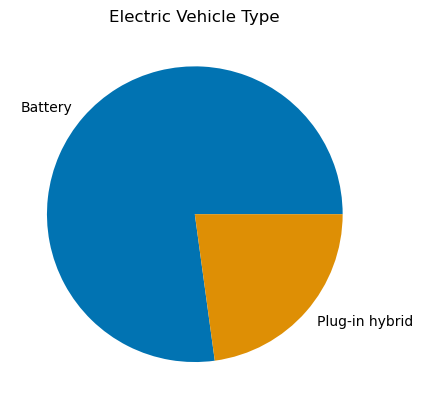

In [13]:
# pie chart for distribution of electric vehicle types
plt.pie(ev_type.values(), labels = ev_type.keys(), colors=sns.color_palette('colorblind'))
plt.title("Electric Vehicle Type")
plt.savefig("Electric_vehicle_type.png")
plt.show()

We see that plug-in hybrids are not as common as their battery electric vehicle cousins, and are perhaps even less desirable in the current market. The proportion of plug-in hybrids still registered could possibly be representative of older vehicles or are less popular current models. 

In [14]:
# create new column top5_brand for stacked bar charts
df.loc[df["Make"].str.contains(
    "TESLA|NISSAN|CHEVROLET|FORD|BMW"),'top5_brand'] = df["Make"]
df["top5_brand"].fillna("OTHER", inplace = True)

#### Stacked Bar Chart of Top 5 Car Brands by Model Year

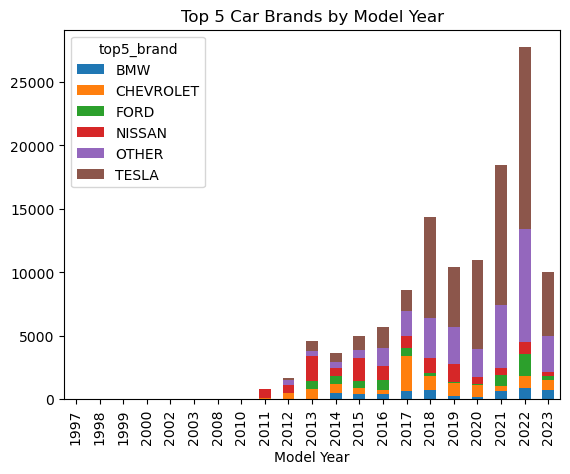

In [15]:
# using pandas plot to create stacked bar chart
bar_plt = df.groupby(['Model Year', 'top5_brand']).size().unstack().plot(kind='bar', 
                                                               stacked=True, title = "Top 5 Car Brands by Model Year")
bar_fig = bar_plt.get_figure()
bar_fig.savefig("Top_5_Car_Brands_Year.png")

We see a very small number of electric vehicles still registered in 2023 that were manufactured before 2011. The majority of electric vehicles are those from 2017 or later, with approximately a third being very new (2021 or later). This seems to suggest an increasing demand for electric vehicles. 

#### Stacked Bar Chart of Top 5 Brands by Legislative District

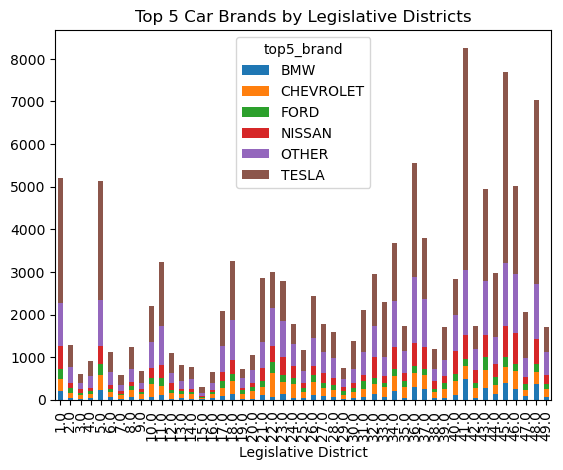

In [16]:
bar_plt2 = df.groupby(['Legislative District', 'top5_brand']).size().unstack().plot(kind='bar', 
                                                               stacked=True, 
                                                               title = "Top 5 Car Brands by Legislative Districts")
bar_fig2 = bar_plt2.get_figure()
bar_fig2.savefig("Top_5_Car_Brands_LegDistrict.png")

In many of the legislative districts, we see a very similar distribution of the car brands, with some exceptions such as in the 3rd, 4th, 7th, 12th, 16th, 19th, 20th, 24th, 29th, 35th, and 42nd districts that appear to have a much lower proportion of Tesla vehicles than the average; in contrast, the 1st, 5th, 41st, 45th, and 48th districts have a much higher proportion of Tesla vehicles than the average. We typically see fewer Tesla vehicles and more "Other" vehicles in districts that have fewer total electric vehicles and more Tesla vehicles in districts with more total electric vehicles. 

### Overview of Milestone 1 Graphs

We see some potentially interesting trends in geographic distribution of brands, with could have sociopolitical weight- for example, could the distribution of brands be related to socioeconomic standing and can that be correlated to geogragraphical boundaries, such as legislative districts. There do not seem to be any extreme outliers as to the distribution of the top 5 brands, either geographically or by model year. There are areas that have significantly smaller and larger populations of total electric vehicles. The imbalanced class categories will present a challenge in model accuracy, but by focusing on the top 5 brands and putting all others into an "Other" category, the imbalances are slightly less severe and can be accomodated better through careful model selection. Because the distributions of the brands remain fairly even across geopolitical boundaries, that feature might not have a lot of predictive power, which complicates the model building process- however, hopefully other features will prove to have enough predictive power to contribute to a working model. 

## Milestone 2
### Week 8

In [17]:
# import libraries
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, f_classif, SelectPercentile

### Deal with Missing Data

#### Data types for each columns

In [18]:
# data types
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

All data types for the columns make sense for the data that they hold. I did originally question whether the VIN (1-10) should be numerical instead, but the VIN column contains a mixed sequence of numbers and letters. 

#### Outlier Detection

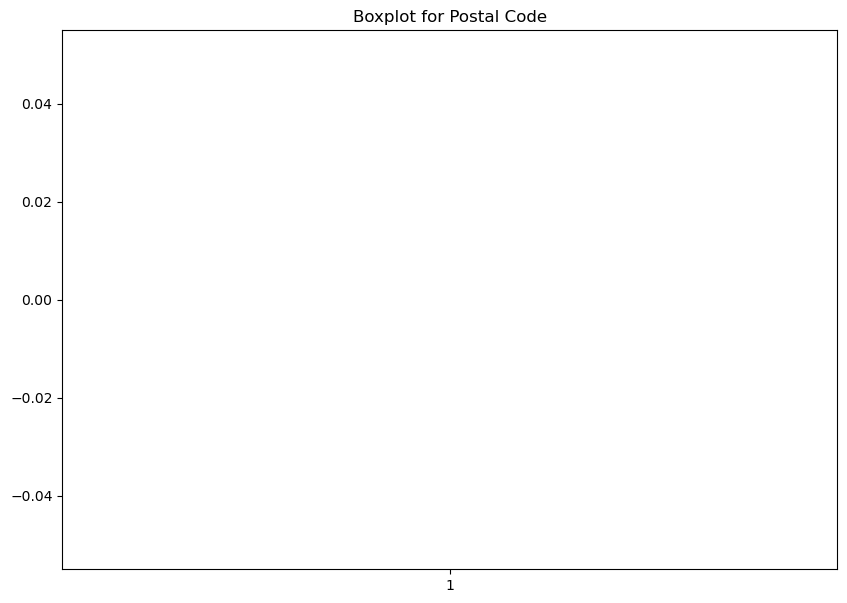

(array([], dtype=int64),)


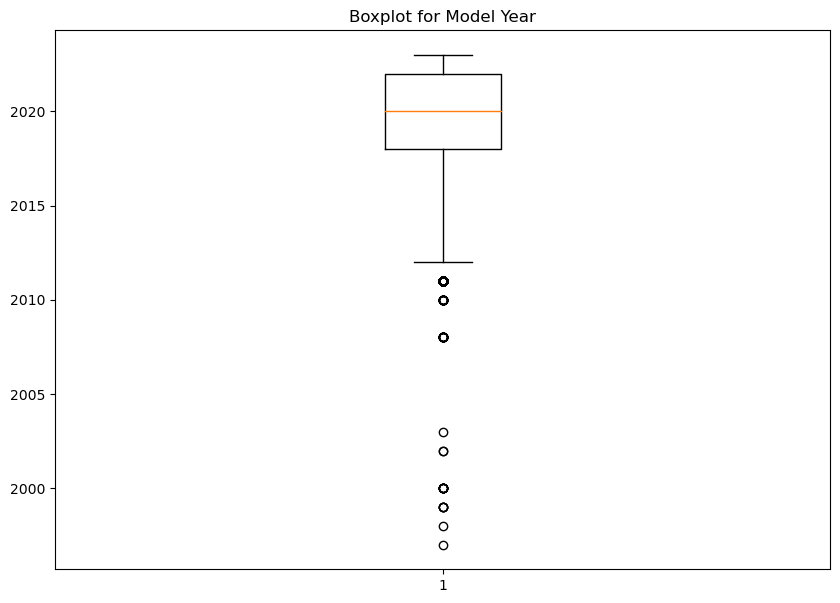

(array([   266,   3741,   4211,   4631,   6310,   8641,  11112,  12005,
        15199,  15973,  19143,  19556,  20523,  21109,  21598,  24292,
        26068,  29357,  31398,  31531,  32337,  32969,  33380,  35499,
        35617,  36197,  40853,  41089,  43201,  46129,  47285,  50493,
        55446,  55897,  60234,  62803,  64633,  64897,  65674,  72064,
        73239,  76463,  80382,  82197,  85476,  86101,  86956,  88054,
        90113,  91681,  96519, 100493, 101263, 102496, 102508, 103389,
       107525, 110839, 112442, 116923, 117415, 118525, 118972, 120938,
       121541]),)


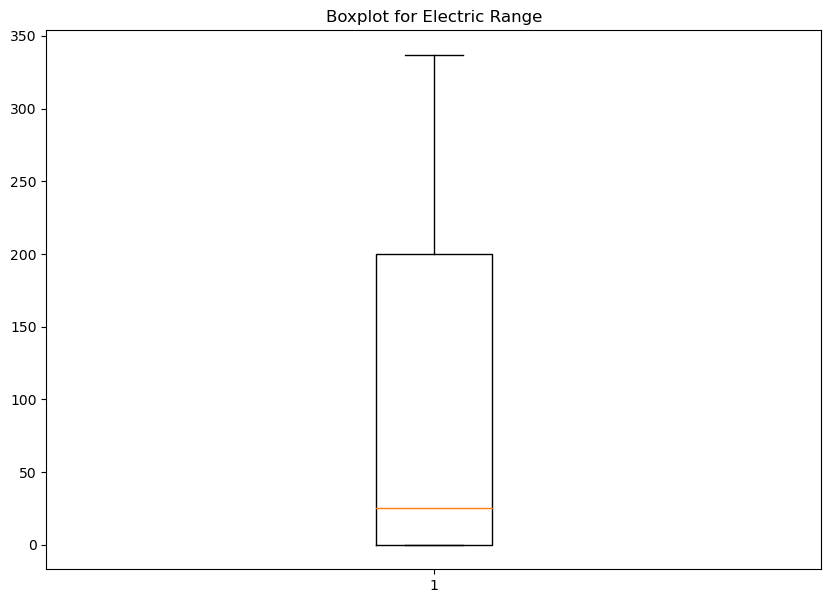

(array([], dtype=int64),)


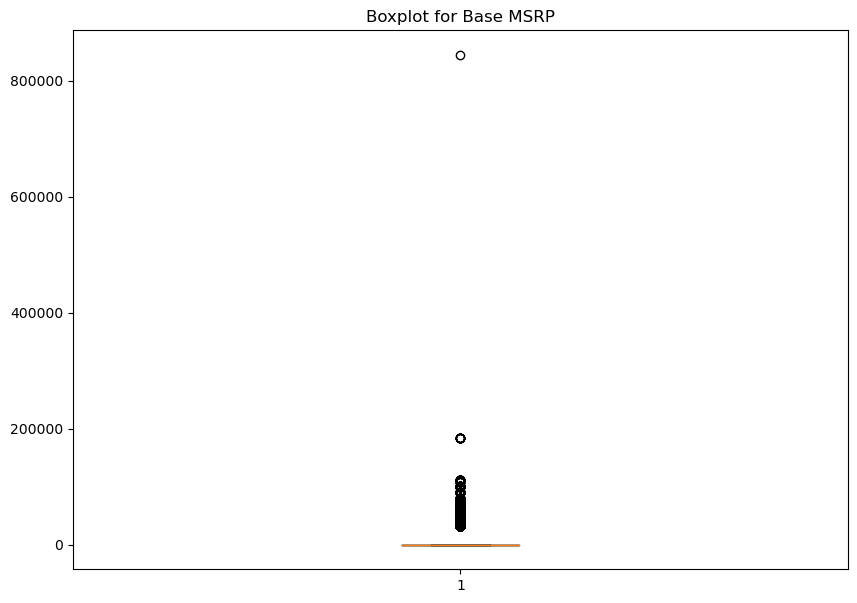

(array([    37,     90,    113, ..., 121937, 121944, 121955]),)


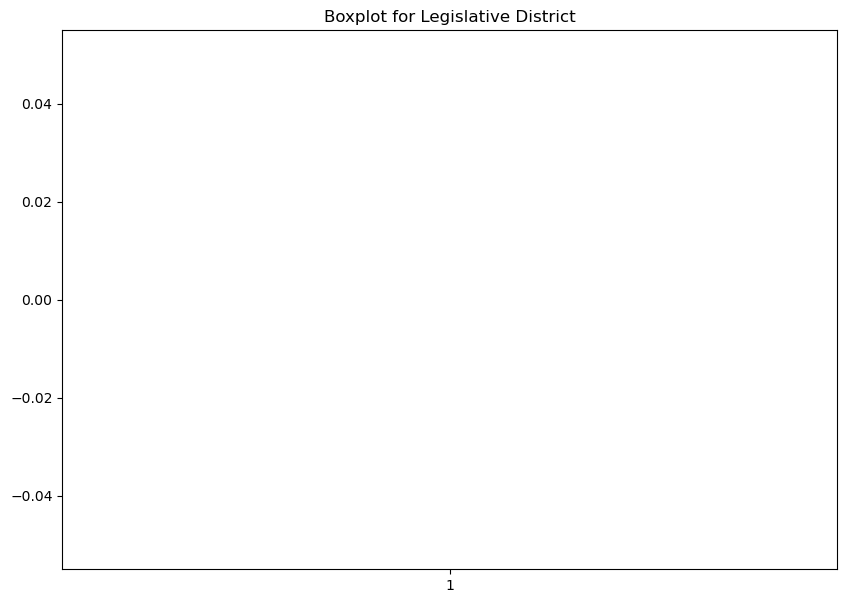

(array([], dtype=int64),)


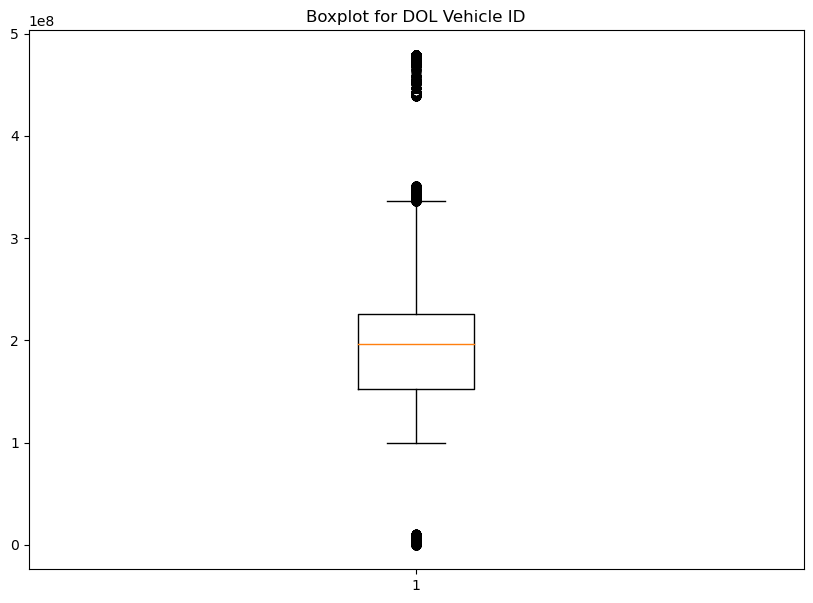

(array([     0,      9,     14, ..., 121929, 121939, 121942]),)


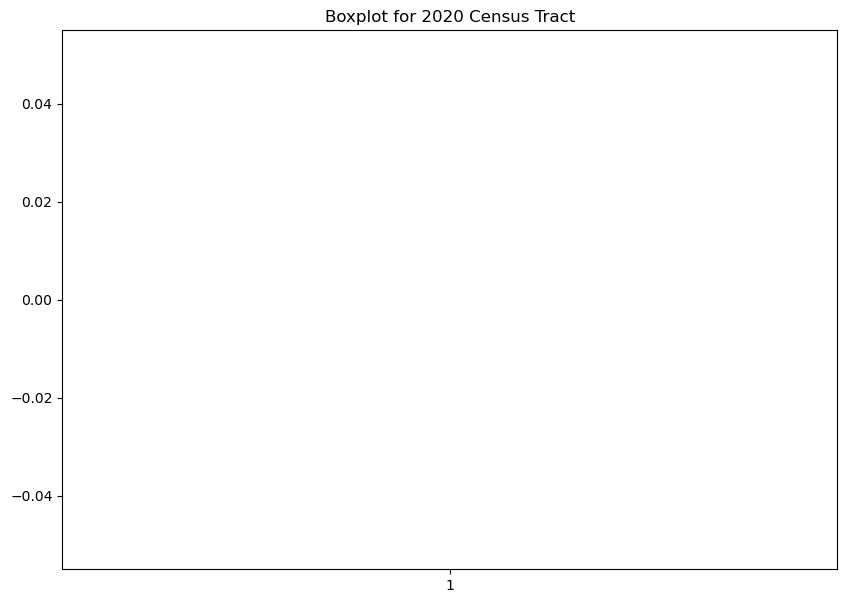

(array([], dtype=int64),)


In [19]:
# create boxplots for numerical columns
for n in df.columns:
    if df[n].dtype != 'O':
        fig = plt.figure(figsize =(10, 7))
        # Creating plot
        plt.boxplot(df[n])
        plt.title("Boxplot for {}".format(n))
        # show plot
        plt.show()
        # return index of outliers
        z = np.abs(stats.zscore(df[n]))
        print(np.where(z > 3))
    else:
        pass

Some columns appear to have a lot of outliers (DOL Vehicle ID and Base MSRP).

#### Number of missing values for each column

In [20]:
# number of NaNs in each column
df.isnull().sum()

VIN (1-10)                                             0
County                                                 2
City                                                   2
State                                                  0
Postal Code                                            2
Model Year                                             0
Make                                                   0
Model                                                104
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 297
DOL Vehicle ID                                         0
Vehicle Location                                      32
Electric Utility                                     469
2020 Census Tract                                      2
top5_brand                     

In [21]:
# value counts for Base MSRP and Electric Range
print(df["Electric Range"].value_counts())
print(df["Base MSRP"].value_counts())

0      47417
215     6361
220     4158
84      4037
238     3466
       ...  
95         3
11         3
39         1
59         1
57         1
Name: Electric Range, Length: 101, dtype: int64
0         118511
69900       1454
31950        406
52900        214
32250        156
54950        137
59900        128
39995        119
44100         98
36900         97
64950         87
33950         81
45600         76
52650         65
34995         62
36800         50
55700         47
53400         32
98950         22
110950        22
81100         19
90700         18
102000        17
75095         16
184400        12
43700         11
109000         7
89100          6
91250          4
32995          3
845000         1
Name: Base MSRP, dtype: int64


In [22]:
# replace 0s with Nans in Electric Range and Base MSRP
df["Electric Range"] = df["Electric Range"].replace(to_replace = 0, value = np.nan)
df["Base MSRP"] = df["Base MSRP"].replace(to_replace = 0, value = np.nan)

The electric range of an electric vehicle should not be 0 and the base MSRP of a car cannot be 0, and so it is assumed that the 0's in the data set are placeholders for missing values.

In [23]:
# number of NaNs in each column
df.isnull().sum()

VIN (1-10)                                                0
County                                                    2
City                                                      2
State                                                     0
Postal Code                                               2
Model Year                                                0
Make                                                      0
Model                                                   104
Electric Vehicle Type                                     0
Clean Alternative Fuel Vehicle (CAFV) Eligibility         0
Electric Range                                        47417
Base MSRP                                            118511
Legislative District                                    297
DOL Vehicle ID                                            0
Vehicle Location                                         32
Electric Utility                                        469
2020 Census Tract                       

#### Drop columns with more than 50% missing data

In [24]:
df1 = df.dropna(axis = 1, thresh = (.5 * df.shape[0] +1))

This only removes the Base MSRP column which was missing about 97% of the data. 

#### Handle Other Missing Values

In [25]:
# number of NaNs in each column
df1.isnull().sum()

VIN (1-10)                                               0
County                                                   2
City                                                     2
State                                                    0
Postal Code                                              2
Model Year                                               0
Make                                                     0
Model                                                  104
Electric Vehicle Type                                    0
Clean Alternative Fuel Vehicle (CAFV) Eligibility        0
Electric Range                                       47417
Legislative District                                   297
DOL Vehicle ID                                           0
Vehicle Location                                        32
Electric Utility                                       469
2020 Census Tract                                        2
top5_brand                                              

#### Former code that imputed missing data
I will fill in missing data that is categorical (such as County or City) with the mode of that column. Legislative District, Postal Code, and 2020 Census Tract (while numerical values) will be filled with the modes as well due to the nature of the data. Location data is, in its own way categorical data because you can either be in one location or be in another but you cannot be partially in one and partially in another location; therefore, mean and median do not capture as accurate of a representation of the data as the mode does for these columns. Electric range will be replaced with the median of the column to decrease the chance of the column being overly affected by outliers. 

#list of columns to replace missing values with mode

missing_mode = ["County", "City", "Postal Code", "Model", "Legislative District", "Vehicle Location", 
                "Electric Utility", "2020 Census Tract"]

#empty dictionary

missing_dic = {}

#loop that calculates mode for each column and adds that to the dictionary

for n in missing_mode:
    
    num = df1[n].mode()[0]
    
    missing_dic.update({n: num})

missing_dic

#replace nans with values in dictionary

df1 = df1.fillna(value = missing_dic)

#calculating median for electric range

med = df1["Electric Range"].median()

#replacing nans with median in electric range

df1["Electric Range"] = df1["Electric Range"].fillna(med)


In [26]:
# drop rows that are missing data
df1 = df1.dropna()

In [27]:
# number of NaNs in each column
df1.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
top5_brand                                           0
dtype: int64

### Drop any features that are not useful for your model building

I will be dropping VIN (1-10) and DOL Vehicle ID as both of these features serve as forms of vehicle identification. Also the DOL Vehicle ID is assigned when registering a vehicle with the DMV which would occur after the vehicle is purchased which would not be available to someone trying to predict the make of a vehicle. Model, Model Year, Clean Alternative Fuel Vehicle (CAFV) Eligibility, and Electric Range are also being dropped because if we do not know a vehicle's make (as that is the target in this model) we cannot possibly know this information about the vehicle as well. 

In [28]:
df2 = df1.drop(columns = ["VIN (1-10)", "Model", "DOL Vehicle ID", "Model Year",
                          "Clean Alternative Fuel Vehicle (CAFV) Eligibility", "Electric Range"])
df2.head()

,County,City,State,Postal Code,Make,Electric Vehicle Type,Legislative District,Vehicle Location,Electric Utility,2020 Census Tract,top5_brand
1,Yakima,Yakima,WA,98908.0,TESLA,Battery Electric Vehicle (BEV),14.0,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10,TESLA
2,Yakima,Yakima,WA,98908.0,AUDI,Battery Electric Vehicle (BEV),14.0,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10,OTHER
5,Thurston,Olympia,WA,98502.0,NISSAN,Battery Electric Vehicle (BEV),22.0,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10,NISSAN
6,Thurston,Tenino,WA,98589.0,CHEVROLET,Plug-in Hybrid Electric Vehicle (PHEV),20.0,POINT (-122.85135 46.85752),PUGET SOUND ENERGY INC,5.306701e+10,CHEVROLET
7,Snohomish,Bothell,WA,98021.0,TESLA,Battery Electric Vehicle (BEV),1.0,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10,TESLA


### Create Dummy Variables 

Created dummy variables for all features. Did not encode Make as that is our target. Also did not encode top5_brand; this is a simplified version of the target variable and it is left in the data set as an alternate to the original target variable if the model proves too complex: if the target variable is simplified such that it contains a smaller number of categories while still containing the majority of the instances, the model accuracy may be able to be increased if the other model proves too complex and accuracy is very low. 

In [29]:
# move columns Make and top5_brand to index positions 0 and 1 in dataframe
df2.insert(0, 'Make', df2.pop('Make'))
df2.insert(1, "top5_brand", df2.pop("top5_brand"))

In [30]:
# get dummy variables for all columns except Make and top5_brand
car_dum = pd.get_dummies(data=df2, columns=df2.columns[2:])
car_dum.head()

,Make,top5_brand,County_Adams,County_Asotin,County_Benton,County_Chelan,County_Clallam,County_Clark,County_Columbia,County_Cowlitz,...,2020 Census Tract_53077003002.0,2020 Census Tract_53077003003.0,2020 Census Tract_53077003004.0,2020 Census Tract_53077003100.0,2020 Census Tract_53077003200.0,2020 Census Tract_53077003400.0,2020 Census Tract_53077940001.0,2020 Census Tract_53077940002.0,2020 Census Tract_53077940003.0,2020 Census Tract_53077940006.0
1,TESLA,TESLA,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AUDI,OTHER,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NISSAN,NISSAN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,CHEVROLET,CHEVROLET,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,TESLA,TESLA,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Extraction/Selection

3343 features is a lot of features, and computation will take an exorbitant amount of time and there is a risk of overfitting the model to the training data; therefore, feature selection is applied such that the top 20% of features are selected and the rest are discarded. 

#### Create random subset of data to train model

#mix = car_dum.sample(n = 5000, random_state = 42)

#### Split data into test/train set

In [31]:
# using 80% training and 20% testing
x = car_dum.iloc[:, 2:]
y = car_dum["Make"]
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    random_state = 42, 
                                                    train_size = 0.80)

In [32]:
# test train split for alternate target variable- conducted now before modeling so there is no chance for data leakage
x1 = car_dum.iloc[:, 2:]
y1 = car_dum["top5_brand"]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, 
                                                    random_state = 42, 
                                                    train_size = 0.80)

#### Former code used for PCA

#90% of variance

#create scaler instance

scaler = StandardScaler()

#standardize feature matrix

x_train_pca = scaler.fit_transform(x_train)

#create PCA that contains 90% of variance

pca = PCA(n_components = 0.9, whiten = True)

#conduct PCA

x_train_pca = pca.fit_transform(x_train_pca)



#pca for alt target 

#create scaler instance

scaler = StandardScaler()

#standardize feature matrix

x1_train_pca = scaler.fit_transform(x1_train)

#create PCA that contains 90% of variance

pca = PCA(n_components = 0.9, whiten = True)

#conduct PCA

x1_train_pca = pca.fit_transform(x1_train_pca)

#### Chi Squared for Feature Selection to reduce number of features from 3343

In [33]:
# select top 20% of features with highest chi-squared values
selector = SelectPercentile(chi2, percentile = 20)
# fit and transform training data
x_train_chi = selector.fit_transform(x_train, y_train)

In [34]:
# dimensionality reduction
print("Original number of features: ", x_train.shape[1])
print("Number of features in PCA-transformed matrix: ", x_train_chi.shape[1])

Original number of features:  3343
Number of features in PCA-transformed matrix:  669


In [35]:
# chi_square transform for test
x_test_chi = selector.transform(x_test)

In [36]:
# select top 20% of features with highest chi-squared values for alt target
selector = SelectPercentile(chi2, percentile = 20)
# fit and transform training data
x1_train_chi = selector.fit_transform(x1_train, y1_train)

In [37]:
# dimensionality reduction
print("Original number of features: ", x1_train.shape[1])
print("Number of features in PCA-transformed matrix: ", x1_train_chi.shape[1])

Original number of features:  3343
Number of features in PCA-transformed matrix:  669


In [38]:
# chi_square transform for test
x1_test_chi = selector.transform(x1_test)

After feature selection, we are left with 669 features. This is a large reduction from the original 3343 features which will greatly reduce computational time for the model and reduce any chance of overfitting of the model, while retaining the interpretability of the model. 

## Milestone 3
### Week 10

This milestone starts with some edits to Milestone 2; namely, additional features (Model Year, Clean Alternative Fuel Vehicle (CAFV) Eligibility, and Electric Range) have been dropped due to the nature of the problem, as we should not have access to that information if we do not know what the vehicle is. Also, PCA is no longer performed on the data, and instead Chi-squared feature selection is used that selects the top 20% of features with the highest chi-squared values. Also, the size of the data set that is being used for hyperparameter tuning has been reduced to 5,000 entries (approximately 4% of the data set) as the original data set could not be trained in a timely model especially when RandomizedSearchCV is being used before GridSearchCV to provide some imsight to further tune the hyperparameters. The hyperparameters chosen at the end of this milestone will be later used to train a model with the full dataset, since these hyperparameters should be pretty idealized.

In [39]:
# import libraries
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline, FeatureUnion

### "Make" Target Model

#### Create Baseline model for comparison
Using DummyClassifier to create baseline model that simulates randomly guessing the make of the vehicle. The "stratified" strategy tells us that it is guessing based off the proportion of each make in the target data

In [40]:
# create baseline model using dummy classifier
dummy = DummyClassifier(strategy = "stratified")
# train dummy model
dummy.fit(x_train_chi, y_train)
# get accuracy score
dummy.score(x_test_chi, y_test)

0.1718539477229857

#### Use RandomizedSearchCV to tune hyperparameters
Using randomized search, we start to parse through hyperparameters to create a (hopefully) better model than the baseline. 

In [41]:
# create dummy estimator
class DummyEstimator(BaseEstimator):
    def fit(self): pass
    def score(self): pass
        
# Create a pipeline
pipe = Pipeline([('clf', DummyEstimator())])

In [42]:
# search space for random forest classifier hyperparameter tuning
search = [{"clf": [RandomForestClassifier()],
           "clf__n_estimators": [10, 100, 1000], 
           "clf__max_features": ["sqrt", "log2"],
           "clf__bootstrap": [True, False], 
           "clf__max_depth" : [int(x) for x in np.linspace(10, 120, num = 12)], 
           "clf__min_samples_split" : [2, 6, 10],
           "clf__min_samples_leaf" : [1, 3, 4]}]

In [43]:
# perform grid search with 3-fold cross-validation
randsearch = RandomizedSearchCV(pipe, search, cv = 3, n_iter = 10, random_state = 42, n_jobs = -1)

In [44]:
# fit random search
rand_model = randsearch.fit(x_train_chi, y_train)

In [45]:
# best model from randomized search and hyperparameters
rand_model.best_params_

{'clf__n_estimators': 100,
 'clf__min_samples_split': 6,
 'clf__min_samples_leaf': 3,
 'clf__max_features': 'sqrt',
 'clf__max_depth': 30,
 'clf__bootstrap': True,
 'clf': RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_leaf=3,
                        min_samples_split=6)}

In [46]:
# score the randomized search model on the testing data
rand_model.score(x_test_chi, y_test)

0.4456345998383185

The accuracy increased from 17.1% from the baseline dummy classifier to 44.6% with the randomized search, which is a great improvement although a far cry from ideal.

#### Hyperparameter tuning using GridSearchCV
Based off the hyperparameters found in the randomized search, further hyperparameter tuning is performed that should result in even more precise tuning, and an even better model.

In [47]:
# search space for random forest classifier hyperparameter tuning based off randomized search
search2 = [{"clf": [RandomForestClassifier()], 
            "clf__n_estimators": [50, 100, 250, 500], 
            "clf__max_features": ["sqrt"],
            "clf__bootstrap": [True], 
            "clf__max_depth" : [20, 30, 40], 
            "clf__min_samples_split" : [6],
            "clf__min_samples_leaf" : [3]}]

In [48]:
# perform grid search with 3-fold cross-validation
gridsearch = GridSearchCV(pipe, search2, cv = 3, n_jobs = -1)
# fit random search
best_model = gridsearch.fit(x_train_chi, y_train)

In [49]:
# best model and hyperparameters
best_model.best_params_

{'clf': RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_leaf=3,
                        min_samples_split=6, n_estimators=500),
 'clf__bootstrap': True,
 'clf__max_depth': 30,
 'clf__max_features': 'sqrt',
 'clf__min_samples_leaf': 3,
 'clf__min_samples_split': 6,
 'clf__n_estimators': 500}

In [50]:
# score the randomized search model on the testing data
best_model.score(x_test_chi, y_test)

0.4457693344112099

The grid search found the same hyperparameters as the randomized search, so the best model for the unedited target has the following hyperparameters:
'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True

The accuracy is approximately 44.6%, which is not a high level of accuracy; therefore, models for the alternative target will also be created.

### Alternative Target ("top5_brand") Model

#### Baseline Model for comparison

In [51]:
# create baseline model using dummy classifier
dummy1 = DummyClassifier(strategy = "stratified")
# train dummy model
dummy1.fit(x1_train_chi, y1_train)
# get accuracy score
dummy1.score(x1_test_chi, y1_test)

0.24548639180813797

#### RandomizedSeachCV hyperparameter tuning

In [52]:
# perform grid search with 3-fold cross-validation
randsearch1 = RandomizedSearchCV(pipe, search, cv = 3, n_iter = 10, random_state = 42, n_jobs = -1)
# fit random search
rand_model1 = randsearch1.fit(x1_train_chi, y1_train)

In [53]:
# best model from randomized search and hyperparameters
rand_model1.best_params_

{'clf__n_estimators': 1000,
 'clf__min_samples_split': 6,
 'clf__min_samples_leaf': 4,
 'clf__max_features': 'log2',
 'clf__max_depth': 40,
 'clf__bootstrap': False,
 'clf': RandomForestClassifier(bootstrap=False, max_depth=40, max_features='log2',
                        min_samples_leaf=4, min_samples_split=6,
                        n_estimators=1000)}

In [54]:
# score the randomized search model on the testing data
rand_model1.score(x1_test_chi, y1_test)

0.5646725949878739

This is a great increase in accuracy from 24.5% accuracy for the baseline dummy classifier model to 56.5% accuracy using the idealized parameters from the randomized search. 

#### GridSearchCV hyperparameter tuning

In [55]:
search3 = [{"clf": [RandomForestClassifier()], 
            "clf__n_estimators": [500, 750, 1000, 1250], 
            "clf__max_features": ["log2"],
            "clf__bootstrap": [False], 
            "clf__max_depth" : [40], 
            "clf__min_samples_split" : [6],
            "clf__min_samples_leaf" : [4]}]

In [56]:
# perform grid search with 3-fold cross-validation
gridsearch = GridSearchCV(pipe, search3, cv = 3, n_jobs = -1)
# fit random search
best_model1 = gridsearch.fit(x1_train_chi, y1_train)

In [57]:
# best model and hyperparameters
best_model1.best_params_

{'clf': RandomForestClassifier(bootstrap=False, max_depth=40, max_features='log2',
                        min_samples_leaf=4, min_samples_split=6,
                        n_estimators=1250),
 'clf__bootstrap': False,
 'clf__max_depth': 40,
 'clf__max_features': 'log2',
 'clf__min_samples_leaf': 4,
 'clf__min_samples_split': 6,
 'clf__n_estimators': 1250}

In [58]:
# score the randomized search model on the testing data
best_model1.score(x1_test_chi, y1_test)

0.5642683912691997

The hyperparameters found in the grid search resulted in an accuracy of 56.5%, which is the same accuracy found in the randomized search. The 56.5% is still not a great accuracy, but is far better than the 44.5% accuracy found with the other target. 

### Conclusion of Milestone 3

The models trained with the alternative target, the simplified target that included the top 5 car makes and all others listed as "Other", experienced a greater accuracy than the other models. This is possibly due to the classes being slightly more balanced than the imbalances seen in the original "Make" target variable, and the fact that the model only had to predict 6 categories. 

When training the entire dataset, it ran overnight without producing a viable model. Logistic regression was originally included in a grid search with the random forest classifier, and every version of the logistic regression failed to converge, implying that a logistic regression model is not the best model for this data. 

Because the maximum efficiency achieved was only 56.5%, the model is perhaps not yet idealized and more hyperparameter tuning could be attempted, including trying other models, such as a support vector machine (even though it is not usually ideal for large datasets, which is why it was not utilized originally). Further work with this data would be to integrate the entire dataset into a model, and to further attempt to tune hyperparameters to increase the accuracy of the model. 

## Milestone 4
### Week 12

This week began with some edits of previous milestones. In Milestone 2, missing data was imputed by column, but now any rows with missing data was dropped wihich decreases the dataset from 121978 rows to 74218. Also in Milestone 2, I worked with only a small subset of the rows that were randomly selected, and moving forward, the entire dataset was used. 

This week starts with attempts to increase the accuracy of the models. I was worried that I had not considered enough options and so I fitted decision tree and Bernoulli Naive Bayeslogistic regression classifier models on the alternate target to see if any of them were more accurate (random forest classifier outperformed them both even though the decision tree model was nearly comparable). Next I tried to see if adding more features (increasing from the top 20% best features by chi-squared to the top 45% increases the accuracy without overfitting or increasing the processing time exponentially. 

In [59]:
# import libraries
from sklearn.tree import DecisionTreeClassifier
import random
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

#### Run Decision Tree and Bernoulli Naive Bayes Classifiers on alternate target to see if accuracy can be increased

In [60]:
# create dummy estimator
class DummyEstimator(BaseEstimator):
    def fit(self): pass
    def score(self): pass
        
# Create a pipeline
pipe = Pipeline([('clf', DummyEstimator())]) # Placeholder Estimator
    
# create search space for decision tree classifier
search_dt = [{'clf': [DecisionTreeClassifier()],
                 'clf__max_depth': [2, 3, None],
                 'clf__criterion': ['gini', 'entropy']}]
# random search for decision tree
rs_dt = RandomizedSearchCV(pipe, search_dt, cv = 3, n_iter = 5, random_state = 42, n_jobs = -1)

In [61]:
# fit random search decision tree model
rs_dt_model = rs_dt.fit(x1_train_chi, y1_train)

In [62]:
# best decision tree model from randomized search and hyperparameters
rs_dt_model.best_params_

{'clf__max_depth': 3,
 'clf__criterion': 'gini',
 'clf': DecisionTreeClassifier(max_depth=3)}

In [63]:
# score the decision tree model
rs_dt_model.score(x1_test_chi, y1_test)

0.5582053354890865

In [64]:
# create Bernoulli Naive Bayes object
classifier = BernoulliNB()
# train model
nb_model = classifier.fit(x1_train_chi, y1_train)

In [65]:
# accuracy score for naive bayes
nb_model.score(x1_test_chi, y1_test)

0.470156292104554

#### Reselect features using top 45% of features with highest chi-squared values and run random forest classifier

In [66]:
# select top 45% of features with highest chi-squared values
selector45 = SelectPercentile(chi2, percentile = 45)
# fit and transform training data
x1_train_chi45 = selector45.fit_transform(x1_train, y1_train)

In [67]:
# chi_square transform for test
x1_test_chi45 = selector45.transform(x1_test)

In [68]:
# dimensionality reduction
print("Original number of features: ", x1_train.shape[1])
print("Number of features in PCA-transformed matrix: ", x1_train_chi45.shape[1])

Original number of features:  3343
Number of features in PCA-transformed matrix:  1504


In [69]:
# perform grid search with 3-fold cross-validation
randsearch45 = RandomizedSearchCV(pipe, search, cv = 3, n_iter = 10, random_state = 42, n_jobs = -1)
# fit random search
rand_model45 = randsearch45.fit(x1_train_chi45, y1_train)

In [70]:
# best model from randomized search and hyperparameters
rand_model45.best_params_

{'clf__n_estimators': 1000,
 'clf__min_samples_split': 6,
 'clf__min_samples_leaf': 4,
 'clf__max_features': 'log2',
 'clf__max_depth': 110,
 'clf__bootstrap': False,
 'clf': RandomForestClassifier(bootstrap=False, max_depth=110, max_features='log2',
                        min_samples_leaf=4, min_samples_split=6,
                        n_estimators=1000)}

In [71]:
# score the randomized search model on the testing data
rand_model45.score(x1_test_chi45, y1_test)

0.5654810024252223

The increase in features in the training set yielded only a 0.09% increase in accuracy, while increasing the processing to over an hour for the randomized search. 

#### Confusion matrix for model using top 45% of features

In [72]:
# predicted value for 45% top features
y_pred45 = rand_model45.predict(x1_test_chi45)

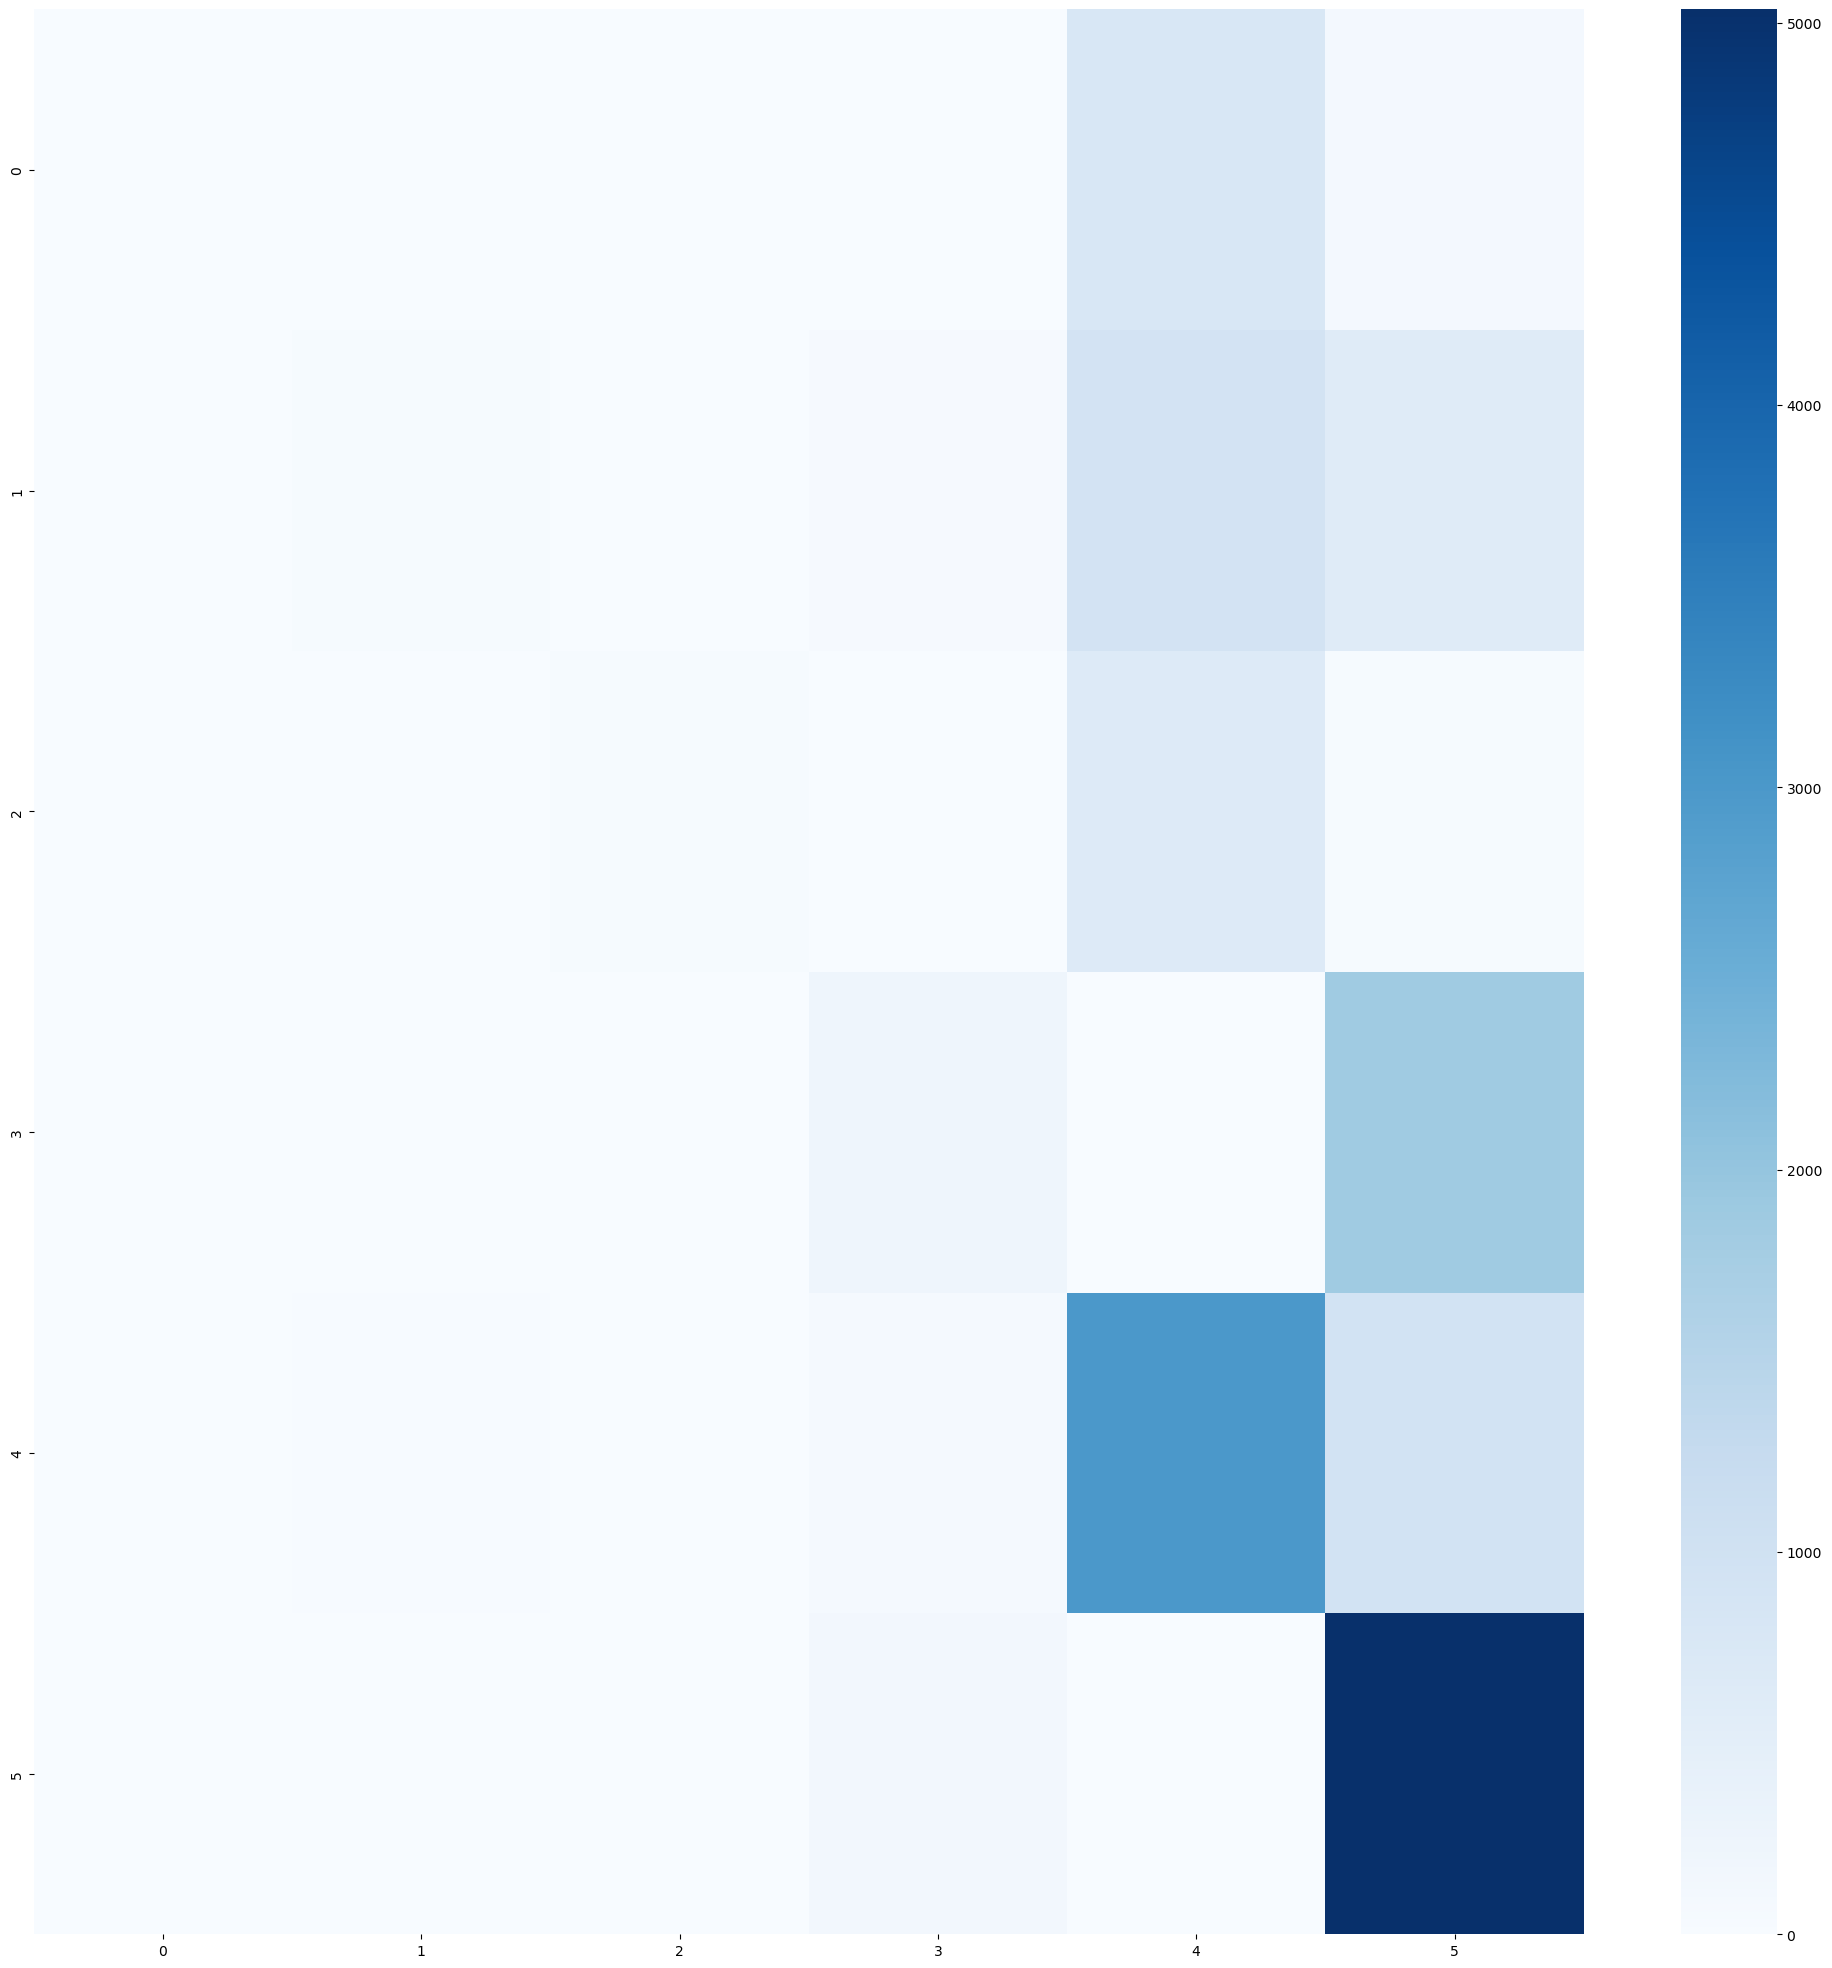

In [73]:
# confusion matrix
cm = confusion_matrix(y1_test, y_pred45)
# plot confusion matrix using seaborn
fig, ax = plt.subplots(figsize = (25,25))
sns.heatmap(cm, cmap='Blues', ax = ax)
plt.savefig("cf_matrix_45.png")

#### Confusion matrix for best model using top 20% features

In [74]:
# predicted values for 20% top features
y_pred = best_model1.predict(x1_test_chi)

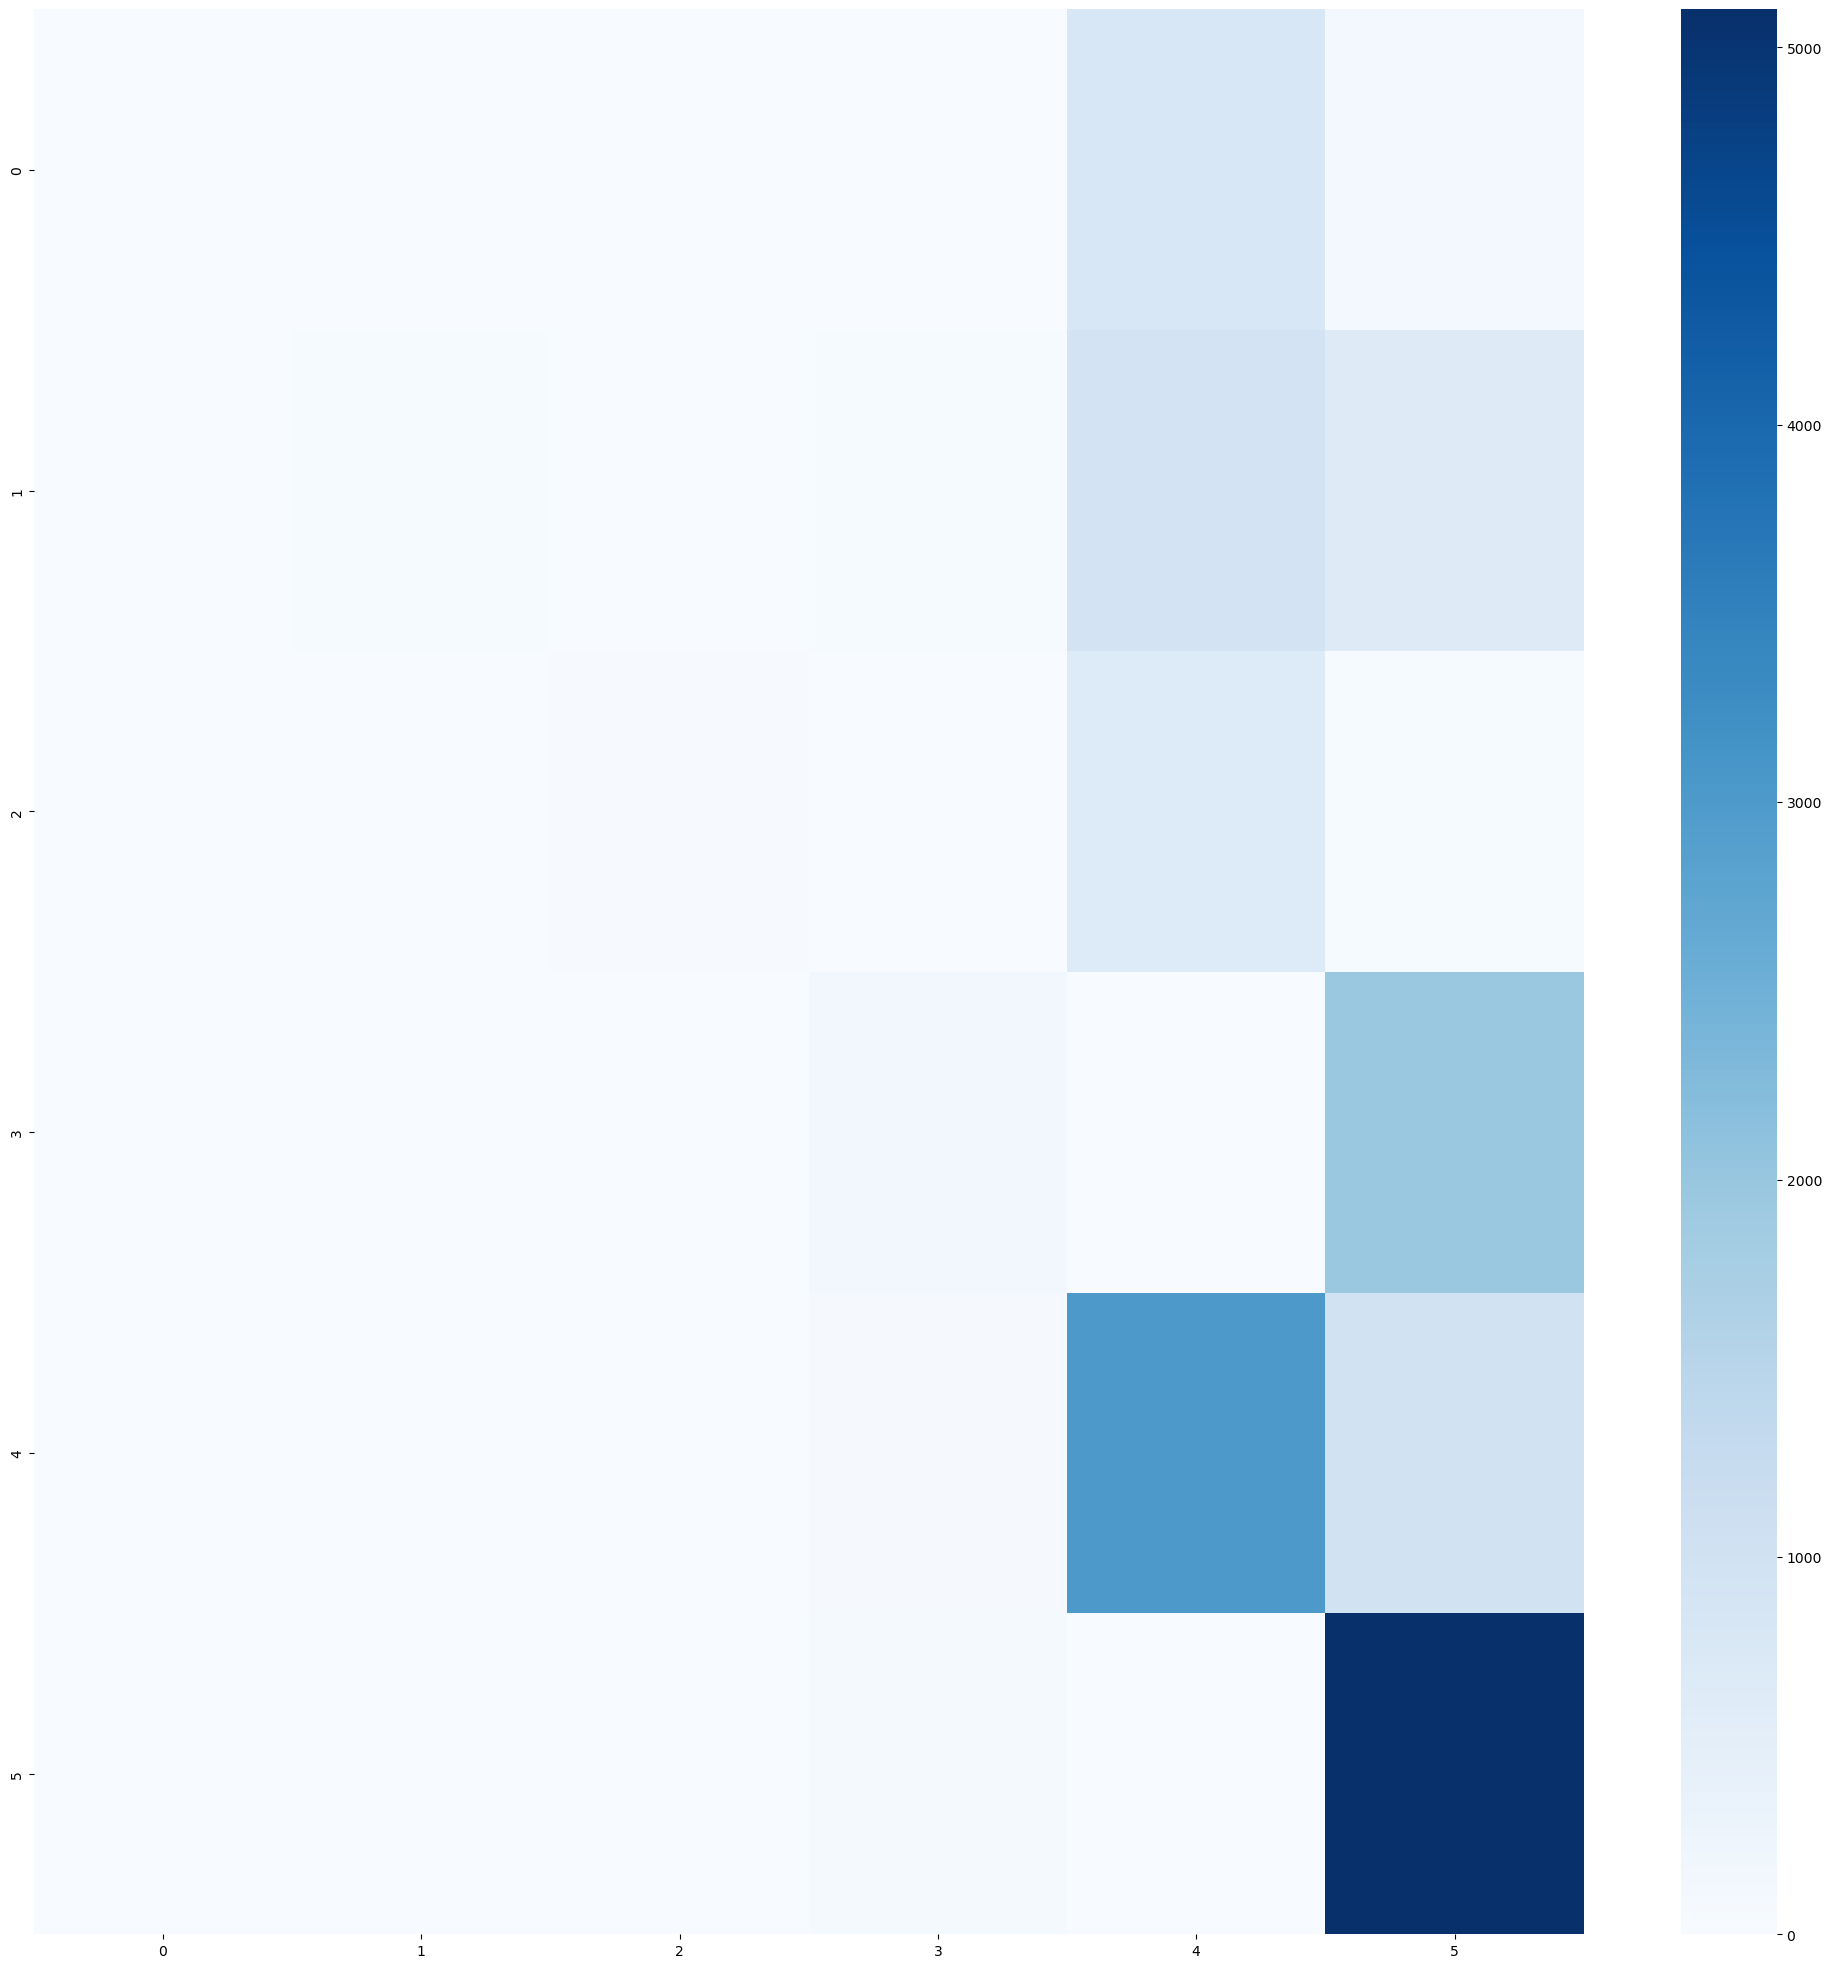

In [75]:
# confusion matrix
cm = confusion_matrix(y1_test, y_pred)
# plot confusion matrix using seaborn
fig, ax = plt.subplots(figsize = (25,25))
sns.heatmap(cm, cmap='Blues', ax = ax)
plt.savefig("cf_matrix_20.png")

In [76]:
# classification report for random forest model trained with the top 20% of features and the alternate target
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

         BMW       0.44      0.01      0.02       949
   CHEVROLET       0.66      0.02      0.05      1699
        FORD       0.87      0.05      0.10       769
      NISSAN       0.43      0.08      0.13      2131
       OTHER       0.55      0.74      0.63      4096
       TESLA       0.58      0.98      0.73      5200

    accuracy                           0.56     14844
   macro avg       0.59      0.31      0.28     14844
weighted avg       0.56      0.56      0.46     14844

